# Optimisation : Placer la plus grande maison possible dans un terrain

- La maison est un rectangle
- Le terrain est un polygone quelconque, il peut être convexe ou concave
- L'optimisation peut être faite en utilisant les algorithmes PSO, DE ou ABC

In [1]:
from math import sqrt

from sympy.geometry import Polygon as SympyPolygon
import matplotlib.pyplot as plt

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [2]:
from ipynb.fs.full.Rectangle import Rectangle
from ipynb.fs.full.Rectangle import create_animation, draw_polygons, draw_polygon, get_color
from ipynb.fs.full.Rectangle import pick_random_sol, get_border_search_field
from ipynb.fs.full.Rectangle import polygon_bounding
from ipynb.fs.full.Rectangle import log_polygons, LOGS

In [3]:
from ipynb.fs.full.PSO import fit as PSO_fit
from ipynb.fs.full.DE import DE

# Main

In [4]:
poly1 = [(0,0), (0,100), (100,100), (110, 50), (100, 0)]
poly2 = [(0,0), (0,100), (30,90), (30,40), (71,25), (71,100), (100,100), (100,0)]
poly3 = [(0,0), (0,100), (30,90), (30,10), (71,25), (71,100), (100,100), (100,0)]
poly4 = [[10,10],[10,400],[400,400],[400,10]]
poly5 = [[10,10],[10,300],[250,300],[350,130],[200,10]] 
poly6 = [[50,150],[200,50],[350,150],[350,300],[250,300],[200,250],[150,350],[100,250],[100,200]]
poly7 = [[50,50],[50,400],[220,310],[220,170],[330,170],[330,480],[450,480],[450,50]]
POLY_LIST = [poly1, poly2, poly3, poly4, poly5, poly6, poly7]

[]

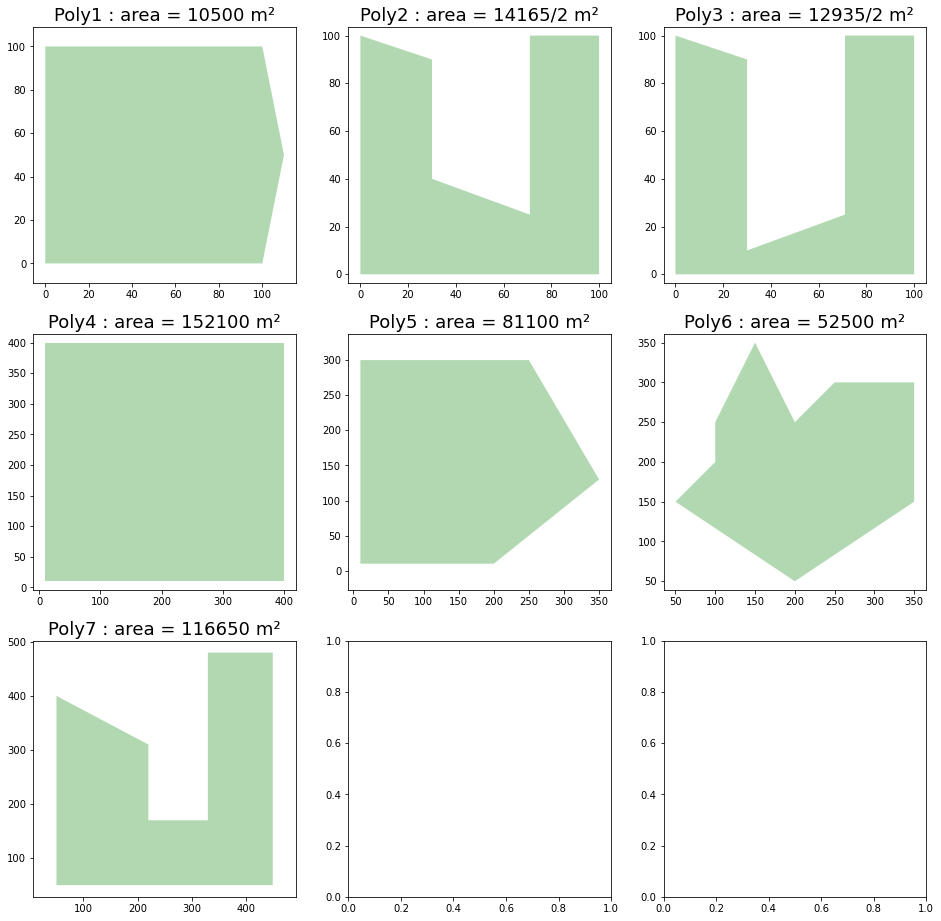

In [5]:
n_poly = len(POLY_LIST)
m = int(sqrt(n_poly)) + 1
fig, ax = plt.subplots(m, m, figsize=(16,16))
for i in range(n_poly):
    LAND = POLY_LIST[i]
    ax = plt.subplot(m, m, i+1)
    ax.set_title(f"Poly{i+1} : area = {abs(SympyPolygon(*LAND).area)} m²", fontsize=18)
    draw_polygon(LAND, color=get_color("Land"))
plt.plot()

In [6]:
DIM = 5

ACCEPT_WHEN_INVALID_MOVE = False
NB_PARTICLES = 100
NB_CYCLES = 1000
PSI, CMAX = 0.4, 1.47

LOG_PADDING = 50
INF, SUP = get_border_search_field(LAND)

if ACCEPT_WHEN_INVALID_MOVE:
    eval_function = lambda x: (
        rect := Rectangle(*x),
        rect.area() if rect.is_valid(LAND) else -rect.area())[-1]
    bounding_function = lambda x: x
else:
    eval_function = lambda x: Rectangle(*x).area()
    bounding_function = lambda x: polygon_bounding(x, LAND)
    
log_function = lambda x, it=0, fitness=None, legend=None, text=None, padding=LOG_PADDING, colors=["green", "red"]: (
    log_polygons(LAND, x, colors, legend, text, padding, it, fitness, show=False))

init_function = lambda: pick_random_sol(LAND, NB_PARTICLES, inf=INF, sup=SUP)
isbetter_function = lambda f1, f2: f1 > f2

## Particule Swarm Optimization

In [7]:
best_sol = PSO_fit(eval_function=eval_function, 
    bounding_function=bounding_function, 
    log_function=log_function,
    init_function=init_function,
    isbetter_function=isbetter_function,
    nb_particle=NB_PARTICLES, 
    dim=DIM, 
    nb_cycles=NB_CYCLES,
    psi=PSI,
    cmax=CMAX)

100%|██████████| 1000/1000 [00:04<00:00, 202.53it/s]


In [8]:
create_animation("Swarm", LAND, LOGS["PSO - Swarm"])

In [9]:
create_animation("Best", LAND, LOGS['PSO - Best'])

In [15]:
printmd(f"### Best fitness = **{best_sol['bestfit']}**")

### Best fitness = **48508.81151876892**

## Differential Evolution

In [11]:
optimizer = DE(eval_function, 
               bounding_func=bounding_function,
               init_func=init_function,
               dim=DIM,
               inf=INF,
               sup=SUP,
               n_agents=NB_PARTICLES,
               n_cycles=NB_CYCLES,
               isbetter_func=isbetter_function,
               log_func=log_function)

In [12]:
optimizer.fit()

100%|██████████| 1000/1000 [00:02<00:00, 355.51it/s]


In [14]:
create_animation("Best", LAND, LOGS['DE - Best'])

In [16]:
printmd(f"### Best fitness = **{optimizer.best_agent['fit']}**")

### Best fitness = **52150.99999813997**

le nombre d'itérations moyen requis pour l'atteinte de l'optimum global, le niveau d'optimisation moyen et finalement, le taux d'atteinte de l'optimum global.